In [ ]:
#Importing the required libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn



In [ ]:
#Loading and inspection of the dataset
df = pd.read_csv('/content/drive/MyDrive/rides_data.csv')

In [ ]:
#Displaying the first five raws of the dataset
df.head()

,services,date,time,ride_status,source,destination,duration,ride_id,distance,ride_charge,misc_charge,total_fare,payment_method
0,cab economy,2024-07-15,08:30:40.542646,completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.83,31.51,796.34,Amazon Pay
1,auto,2024-07-05,23:36:51.542646,completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.83,49.52,364.35,Paytm
2,auto,2024-07-23,11:05:37.542646,cancelled,Babusapalya Cove,Kothaguda Terrace,25,RD9376481122237926,20.24,NaN,NaN,NaN,NaN
3,cab economy,2024-06-24,08:45:10.542646,completed,Mahadevapura Mews,Kanakapura Arc,89,RD3676889143182765,31.17,484.73,15.84,500.57,QR scan
4,cab economy,2024-07-15,00:26:44.542646,completed,Ganganagar Cove,Basaveshwaranagar Colony,95,RD6639410275948084,27.21,663.50,14.13,677.63,Amazon Pay


In [ ]:
#Dimension of the dataset
df.shape

(50000, 13)

In [ ]:
#differnet variables in the dataset for eda
df.columns

Index(['services', 'date', 'time', 'ride_status', 'source', 'destination',
       'duration', 'ride_id', 'distance', 'ride_charge', 'misc_charge',
       'total_fare', 'payment_method'],
      dtype='object')

In [ ]:
#services
s = df['services'].unique()
s

array(['cab economy', 'auto', 'parcel', 'bike lite', 'bike'], dtype=object)

In [ ]:
#
p = df['payment_method'].unique()
p

array(['Amazon Pay', 'Paytm', nan, 'QR scan', 'GPay'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   services        50000 non-null  object 
 1   date            50000 non-null  object 
 2   time            50000 non-null  object 
 3   ride_status     50000 non-null  object 
 4   source          50000 non-null  object 
 5   destination     50000 non-null  object 
 6   duration        50000 non-null  int64  
 7   ride_id         50000 non-null  object 
 8   distance        50000 non-null  float64
 9   ride_charge     44964 non-null  float64
 10  misc_charge     44964 non-null  float64
 11  total_fare      44964 non-null  float64
 12  payment_method  44964 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 5.0+ MB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,50000.0,64.320100,31.852336,10.00,37.0000,64.00,92.0000,119.00
distance,50000.0,25.528243,14.177136,1.00,13.2600,25.46,37.8600,50.00
ride_charge,44964.0,522.428805,274.726031,50.03,283.6575,520.03,759.3675,999.96
misc_charge,44964.0,24.964289,14.459417,0.00,12.4000,25.07,37.5100,50.00
total_fare,44964.0,547.393093,275.094813,50.58,308.9200,544.92,785.5025,1048.80


In [ ]:
#Random questions
#1.what is most fovourite destination
a = df['destination'].value_counts().idxmax()
a

In [ ]:
#Random questions
#1.what is most fovourite source
b = df['source'].value_counts().idxmax()
b

'Kothanur Landing'

In [ ]:
#3.average total fare for cab economy
e = df[df['services']=='cab economy']['total_fare'].mean()
e

547.248911237429

In [ ]:
#4.average total fare for bikes
f = df[df['services']=='bike']['total_fare'].mean()
f

547.8575919510577

In [ ]:
#Handling the misssing values
df.isnull().sum()

,0
services,0
date,0
time,0
ride_status,0
source,0
destination,0
duration,0
ride_id,0
distance,0
ride_charge,5036


In [ ]:
#Data cleaning

In [ ]:

df['ride_charge'].fillna(0,inplace=True)
df['misc_charge'].fillna(0,inplace=True)
df['total_fare'].fillna(0,inplace=True)


In [ ]:
df.time

,time
0,08:30:40.542646
1,23:36:51.542646
2,11:05:37.542646
3,08:45:10.542646
4,00:26:44.542646
...,...
49995,10:12:37.811393
49996,11:24:08.811393
49997,21:52:48.811393
49998,20:44:00.811393


In [ ]:
df['time'] = df.time.apply(lambda x: x.split('.')[0])


In [ ]:
df.time

,time
0,08:30:40
1,23:36:51
2,11:05:37
3,08:45:10
4,00:26:44
...,...
49995,10:12:37
49996,11:24:08
49997,21:52:48
49998,20:44:00


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   services        50000 non-null  object        
 1   date            50000 non-null  datetime64[ns]
 2   time            50000 non-null  object        
 3   ride_status     50000 non-null  object        
 4   source          50000 non-null  object        
 5   destination     50000 non-null  object        
 6   duration        50000 non-null  int64         
 7   ride_id         50000 non-null  object        
 8   distance        50000 non-null  float64       
 9   ride_charge     50000 non-null  float64       
 10  misc_charge     50000 non-null  float64       
 11  total_fare      50000 non-null  float64       
 12  payment_method  44964 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 5.0+ MB


In [ ]:
#Data Analysis

In [ ]:
plt.style.use('seaborn-darkgrid')
import warnings
warnings.filterwarnings('ignore')

<ipython-input-38-cccbe557eda6>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


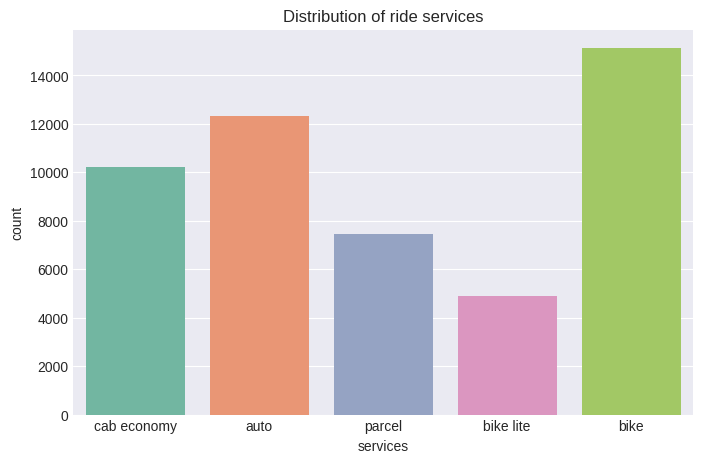

In [ ]:
#Distribution of ride services
plt.figure(figsize=(8,5))
sn.countplot(data=df,x="services",palette='Set2')
plt.title('Distribution of ride services')
plt.show()

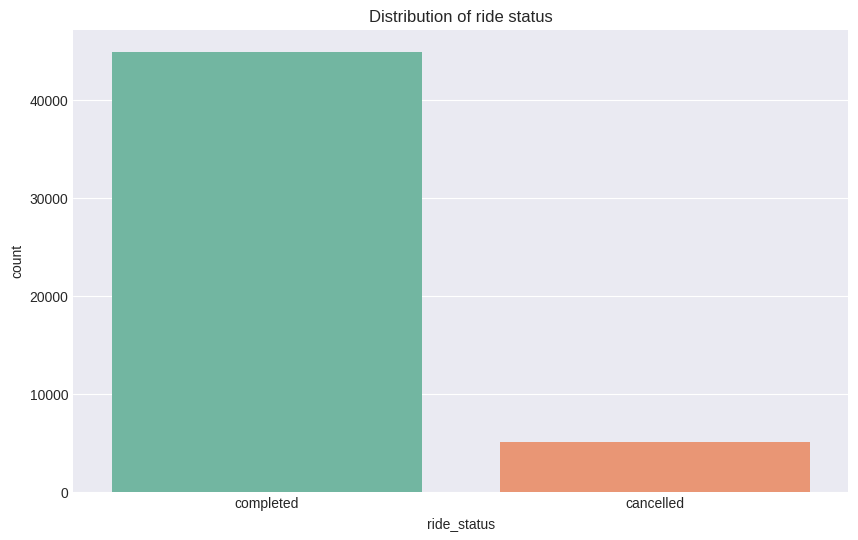

In [ ]:
#Distribution of Ride status
plt.figure(figsize=(10,6))
sn.countplot(data=df,x="ride_status",palette='Set2')
plt.title('Distribution of ride status')
plt.show()

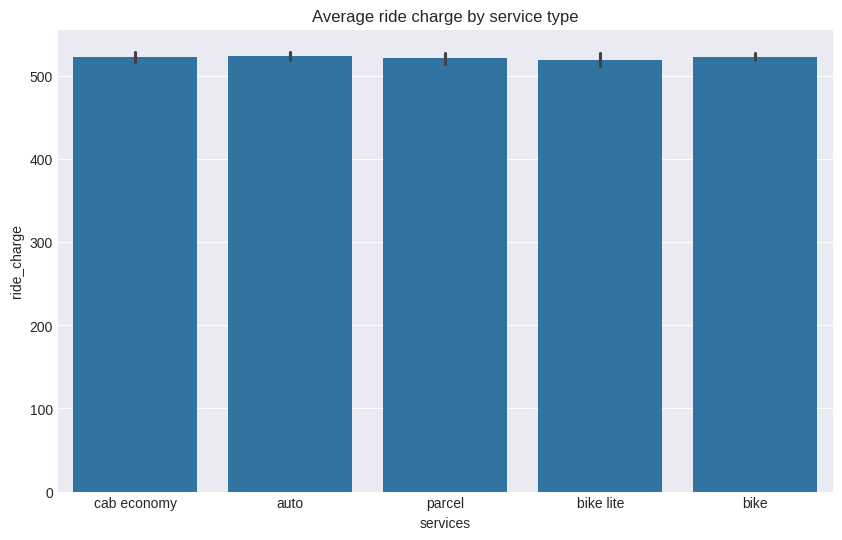

In [ ]:
#Average ride charge by each service
plt.figure(figsize=(10,6))
sn.barplot(data=df[df['ride_status']=='completed'],x='services',y='ride_charge',estimator=np.mean)
plt.title('Average ride charge by service type')
plt.show()

In [ ]:
#Data visualization

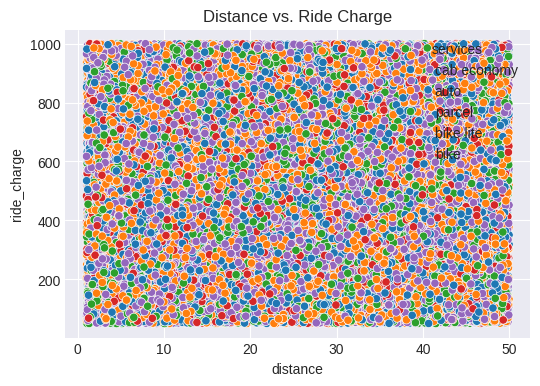

In [ ]:
#Scatterplot of distance and ride charge
plt.figure(figsize=(6,4))
sn.scatterplot(data=df[df['ride_status'] == 'completed'], x='distance', y='ride_charge', hue='services')
plt.title('Distance vs. Ride Charge')
plt.show()

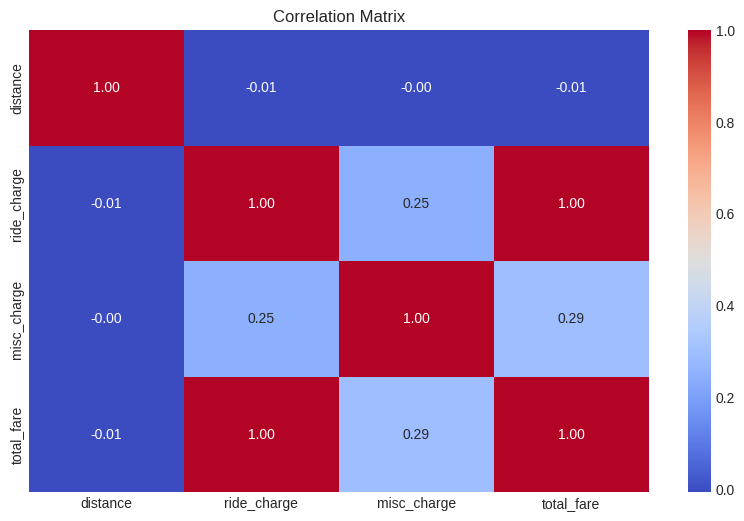

In [ ]:
#Heatmap of correlation matrix
plt.figure(figsize=(10,6))
cr = df[['distance', 'ride_charge', 'misc_charge', 'total_fare']].corr()
sn.heatmap(cr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Visualization based on each columns


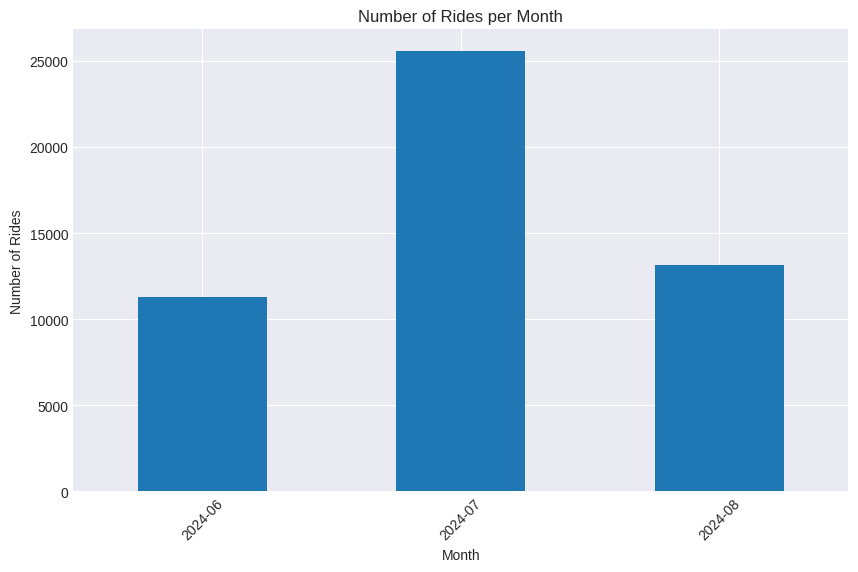

In [ ]:
#Visualization for date column
plt.figure(figsize=(10, 6))
df['date'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title('Number of Rides per Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()


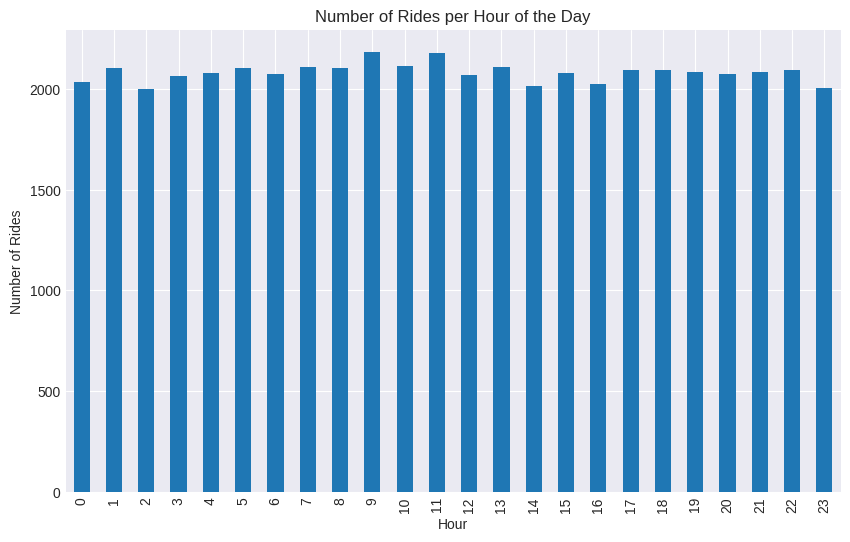

In [ ]:
#Visualization for time column
plt.figure(figsize=(10, 6))
df['time'].apply(lambda x: x.hour).value_counts().sort_index().plot(kind='bar')
plt.title('Number of Rides per Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Rides')
plt.show()


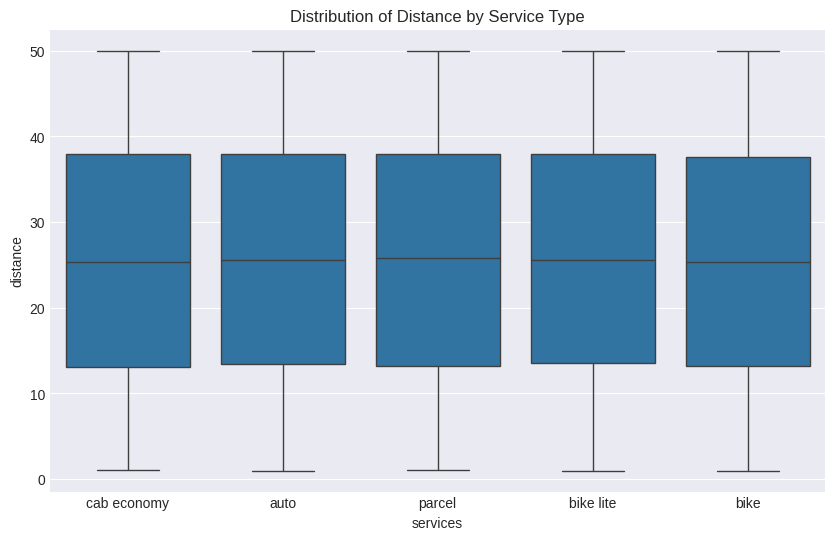

In [ ]:
#Boxplot for distance
plt.figure(figsize=(10,6))
sn.boxplot(data=df, x='services', y='distance')
plt.title('Distribution of Distance by Service Type')
plt.show()


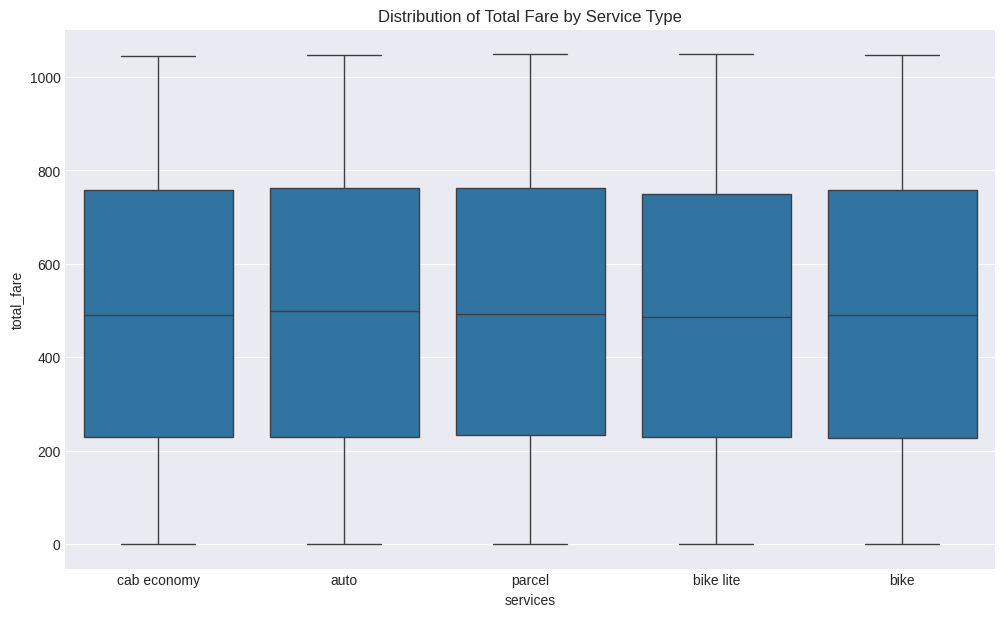

In [ ]:
#Boxplot for total fare
plt.figure(figsize=(12, 7))
sn.boxplot(data=df, x='services', y='total_fare')
plt.title('Distribution of Total Fare by Service Type')
plt.show()

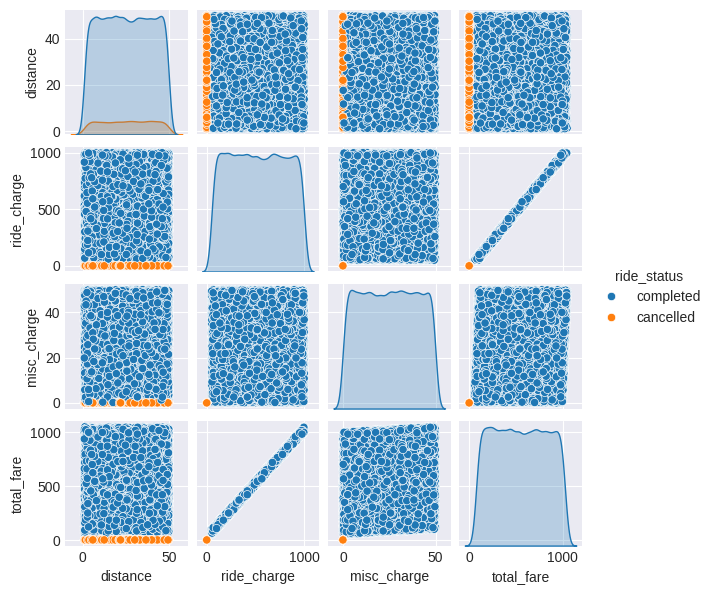

In [ ]:
#Pairplot to visualize relationships between numerical variables
sn.pairplot(df[['distance', 'ride_charge', 'misc_charge', 'total_fare', 'ride_status']], hue='ride_status',height=1.5,aspect=1)
plt.show()